<a href="https://colab.research.google.com/github/Ademkck/Ademkck-Amazon-Stock-Price-Exploratory-Data-Analysis-and-Prediction-by-using-Machine-Learning/blob/main/Human_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/CK+48.zip

Archive:  /content/drive/MyDrive/CK+48.zip
   creating: CK+48/anger/
 extracting: CK+48/anger/S010_004_00000017.png  
 extracting: CK+48/anger/S010_004_00000018.png  
 extracting: CK+48/anger/S010_004_00000019.png  
 extracting: CK+48/anger/S011_004_00000019.png  
 extracting: CK+48/anger/S011_004_00000020.png  
 extracting: CK+48/anger/S011_004_00000021.png  
 extracting: CK+48/anger/S014_003_00000028.png  
 extracting: CK+48/anger/S014_003_00000029.png  
 extracting: CK+48/anger/S014_003_00000030.png  
 extracting: CK+48/anger/S022_005_00000030.png  
 extracting: CK+48/anger/S022_005_00000031.png  
 extracting: CK+48/anger/S022_005_00000032.png  
 extracting: CK+48/anger/S026_003_00000013.png  
 extracting: CK+48/anger/S026_003_00000014.png  
 extracting: CK+48/anger/S026_003_00000015.png  
 extracting: CK+48/anger/S028_001_00000022.png  
 extracting: CK+48/anger/S028_001_00000023.png  
 extracting: CK+48/anger/S028_001_00000024.png  
 extracting: CK+48/anger/S029_001_00000017.png  


In [3]:
import numpy as np
import pandas as pd


In [9]:
import cv2
import os
directory = '/content/CK+48'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(48,48))
        image_data_list.append(input_img)
        labels.append(l)
    print('Loaded images from '+data_dir)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

Loaded images from contempt
Loaded images from fear
Loaded images from surprise
Loaded images from sadness
Loaded images from happy
Loaded images from anger
Loaded images from disgust


(981, 48, 48, 3)

In [10]:
print(emotions)
def getLabel(id):
    return emotions[id]

['contempt', 'fear', 'surprise', 'sadness', 'happy', 'anger', 'disgust']


In [11]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2,shuffle=True)
X_train.shape

(784, 48, 48, 3)

[0. 0. 0. 0. 0. 0. 1.]


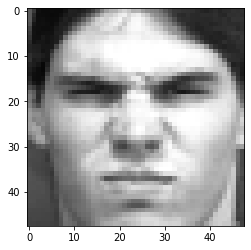

In [12]:
from matplotlib import pyplot as plt
print(y_train[499])
plt.imshow(X_train[499], interpolation='nearest')
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator_with_aug = ImageDataGenerator(horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
data_generator_no_aug = ImageDataGenerator()

train_data_generator=data_generator_with_aug.flow(X_train,y_train)
validation_generator=data_generator_with_aug.flow(X_test,y_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/250
25/25 [==============================] - 34s 1s/step - loss: 1.9337 - accuracy: 0.2130 - val_loss: 1.8469 - val_accuracy: 0.2081
Epoch 2/250
25/25 [==============================] - 31s 1s/step - loss: 1.8910 - accuracy: 0.1888 - val_loss: 1.8108 - val_accuracy: 0.2081
Epoch 3/250
25/25 [==============================] - 32s 1s/step - loss: 1.9133 - accuracy: 0.2066 - val_loss: 1.8716 - val_accuracy: 0.2081
Epoch 4/250
25/25 [==============================] - 31s 1s/step - loss: 1.8780 - accuracy: 0.2296 - val_loss: 1.8617 - val_accuracy: 0.2234
Epoch 5/250
25/25 [==============================] - 31s 1s/step - loss: 1.8675 - accuracy: 0.2283 - val_loss: 1.8419 - val_accuracy: 0.2640
Epoch 6/250
25/25 [==============================] - 31s 1s/step - loss: 1.8548 - accuracy: 0.2194 - val_loss: 1.8224 - val_accuracy: 0.2640
Epoch 7/250
25/25 [==============================] - 31s 1s/step - loss: 1.8568 - accuracy: 0.2372 - val_loss: 1.8014 - val_accuracy: 0.2640
Epoch 8/250
2

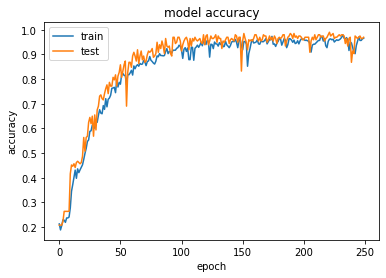

In [15]:
import matplotlib.pyplot as plt
history=model.fit_generator(train_data_generator,epochs=250,validation_data=validation_generator)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ValueError: ignored

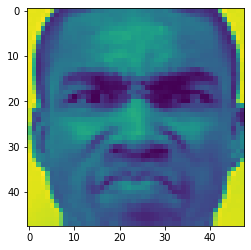

In [29]:
from matplotlib import pyplot as plt

import cv2


import PIL.Image
image = PIL.Image.open(r'/content/CK+48/anger/S504_001_00000021.png')
image.show()

test_image=image.resize((48,48))
plt.imshow(test_image)
test_image=np.array(test_image)
test_image=test_image/255
test_image=np.reshape(test_image,(1,48,48))
out=np.argmax(model.predict(image), axis=2)
for i in out:
    print(getLabel(i))

In [32]:
model.save("name.h5")